In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Data preparation and features analysis

In [3]:
features_df = pd.read_csv('features.csv')
tags_df = pd.read_csv('tags.csv')

In [47]:
new_df = features_df.copy()
new_df.drop(columns=['node1', 'node2'], inplace=True)
new_df = new_df.astype('float64')
new_df['label'] = tags_df['label']

<AxesSubplot:title={'center':'cn'}, xlabel='label'>

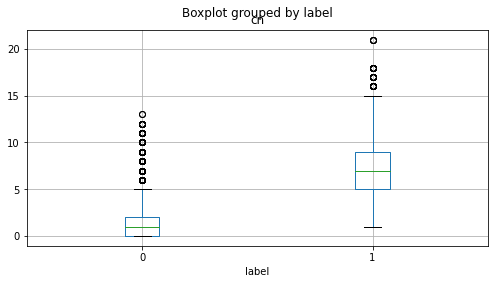

In [48]:
new_df.boxplot(column='cn', by='label', figsize=(8,4))

<AxesSubplot:title={'center':'tn'}, xlabel='label'>

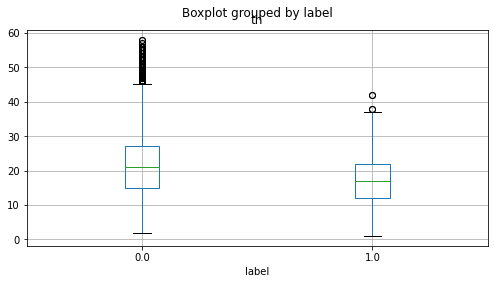

In [11]:
new_df.boxplot(column='pa', by='label', figsize=(8,4))

<AxesSubplot:title={'center':'tn'}, xlabel='label'>

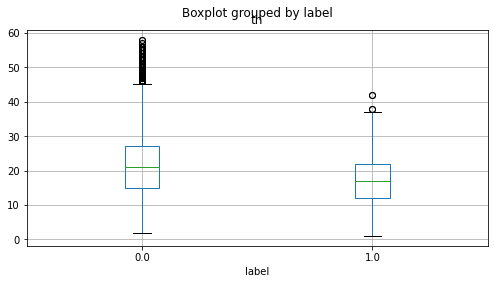

In [12]:
new_df.boxplot(column='tn', by='label', figsize=(8,4))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns='label'), new_df['label'], test_size=0.33, random_state=42)

# Model training and hyperparameter tuning

In [24]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
hyperparameters = {
    'n_estimators': [10, 25, 50, 100],
    'criterion':['gini', 'entropy']
}
model_rf = GridSearchCV(RandomForestClassifier(), param_grid=hyperparameters, cv=10)

In [ ]:
model_rf.fit(X_train, y_train)
print(model_rf.best_params_)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [49]:
from sklearn.naive_bayes import MultinomialNB 
hyperparameters = {
    'alpha': [1, 5, 10, 20, 100]
}
model_nb = GridSearchCV(MultinomialNB(), param_grid=hyperparameters, cv=10)

In [61]:
model_nb.fit(X_train, y_train)
print(model_nb.best_params_)

{'alpha': 100}


In [62]:
y_pred = model_nb.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     55197
         1.0       0.36      0.61      0.45       412

    accuracy                           0.99     55609
   macro avg       0.68      0.80      0.72     55609
weighted avg       0.99      0.99      0.99     55609



In [70]:
from sklearn.neighbors import KNeighborsClassifier 
hyperparameters = {
    'n_neighbors': [5, 10, 20]
}
model_knn = GridSearchCV(KNeighborsClassifier(), param_grid=hyperparameters, cv=10)

In [71]:
model_knn.fit(X_train, y_train)
print(model_knn.best_params_)

{'n_neighbors': 5}


In [72]:
y_pred = model_knn.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55197
         1.0       0.99      0.87      0.92       412

    accuracy                           1.00     55609
   macro avg       1.00      0.93      0.96     55609
weighted avg       1.00      1.00      1.00     55609

